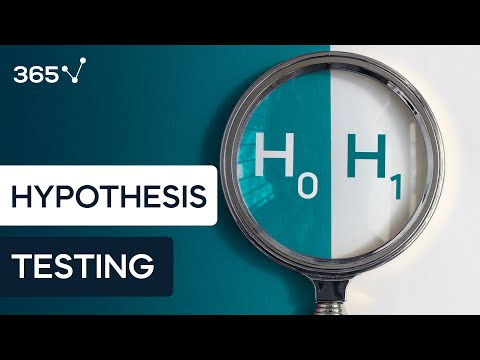

In [2]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)



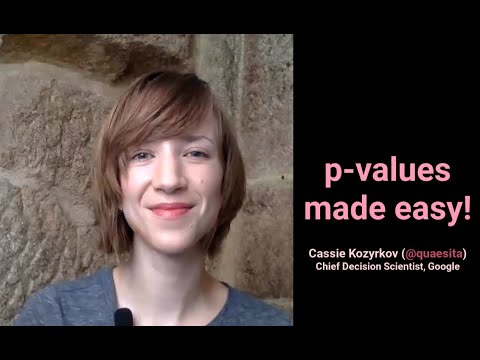

In [1]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)



Q1

The key difference between the ideas that can and cannot be examined and tested statistically is measurability and observability. A testable idea must be observable and measurable in some way, allowing for data collection and analysis. Without measurable variables, statistical testing is not possible.

A good null hypothesis is one that is clear, precise, and testable. It should state that there is no effect or no difference between groups being studied, and it must be capable of being supported or rejected through data analysis.

The null hypothesis assumes no difference or the status quo world, while the alternative hypothesis suggests that there is a difference from the assumed world.

Q2

The sentence "It is important to note that outcomes of tests refer to the population parameter rather than the sample statistic!" means that when we perform statistical tests, we attempt to draw conclusions about the whole populations rather than just the specific sample that we used.

The following terms refer to statistic/element of the sample:
x-i refers to an individual data point in the sample
x-bar is the average of those data points in the sample

The following refers to the parameter of the population:
mu represents the true average of the entire population (which we do not know)
mu-zero is the assuemd average of the population under the null hypothesis.

In practice, we can view it this way, for example, we calculate the average x-bar from the sample data, the result of our test in intended to tell us something about mu, which is the true average of the population.

Q3

When we calculate a p-value, we pretend the null hypothesis is true to see how unusual or likely the observed data would be in that scenario. If the p-value is great, it means that it is very possible that our case fits the null hypothesis, while if the p-value is small, it means that our case is very unlikely under the null hypothesis.

Q4

A smaller p-value means that the chances of seeing the data we observed (sample) are very low if the null hypothesis were true.

In [7]:
#Q5:

import numpy as np

# Given data
n_couples = 124  # total couples
n_right_tilt = 80  # couples tilting to the right
observed_proportion = n_right_tilt / n_couples

# Simulation settings
n_simulations = 10000
null_hypothesis_proportion = 0.5  # Null hypothesis: 50/50 split

# Simulate flipping coins for each couple (right tilt = 1, left tilt = 0)
simulations = np.random.binomial(n_couples, null_hypothesis_proportion, n_simulations)

# Proportion of right tilts in each simulation
simulated_proportions = simulations / n_couples

# Calculate the p-value: Proportion of simulations with a proportion >= the observed proportion
p_value = np.sum(simulated_proportions >= observed_proportion) / n_simulations
p_value



0.0006

Q5 continued:

Sicne the simulated p-value is 0.0006, based on the table provided, this falls under the category of "very strong evidence against the null hypohtesis since 0.0006 <= 0.001

Q6
No, a low p-value suggests strong evidence to reject the null hypothesis, but no p-value, no matter how small, can definitively prove or disprove a hypothesis. Statistical testing always carries a degree of uncertainty.

In [4]:
#Q7

import numpy as np
import pandas as pd

# Data setup
patient_data = pd.DataFrame({
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})

# Calculate health score change
patient_data['HealthScoreChange'] = patient_data.FinalHealthScore - patient_data.InitialHealthScore

# Null hypothesis (H0): No effect (i.e., proportion of patients with positive health score change is 0.5)
population_parameter_value_under_H0 = 0.5

# Observed statistic: proportion of patients with a positive health score change
observed_statistic = (patient_data.HealthScoreChange > 0).mean()

# Simulate statistics under H0: random proportion of positive changes
number_of_simulations = 10000
simulated_statistics = np.random.binomial(n=len(patient_data), p=population_parameter_value_under_H0, size=number_of_simulations) / len(patient_data)

# One-tailed hypothesis test
# H1 (alternative hypothesis): The proportion of positive health score changes is GREATER than 0.5
SimStats_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic

# Compute the p-value for a one-tailed test
p_value_one_tailed = np.mean(SimStats_more_extreme_than_ObsStat)

print("Observed statistic (proportion of positive health score changes):", observed_statistic)
print("One-tailed p-value:", p_value_one_tailed)

# Compare this with the two-tailed test for educational purposes
SimStats_as_or_more_extreme_than_ObsStat = abs(simulated_statistics - population_parameter_value_under_H0) >= abs(observed_statistic - population_parameter_value_under_H0)
p_value_two_tailed = np.mean(SimStats_as_or_more_extreme_than_ObsStat)
print("Two-tailed p-value:", p_value_two_tailed)


Observed statistic (proportion of positive health score changes): 0.8
One-tailed p-value: 0.0563
Two-tailed p-value: 0.067


Q7 continued

In the one-tailed test, the key change in the code is that we now only consider whether the observed statistic is greater than the hypothesized population parameter (0.5), rather than checking for deviations in both directions as in the two-tailed test. Specifically, the code now checks if the simulated statistics are greater than or equal to the observed statistic, focusing on just one side of the distribution.

This change affects the interpretation by making the alternative hypothesis directional. The one-tailed test asks whether the proportion of positive health score changes is greater than 0.5, rather than simply being different from 0.5 (which the two-tailed test evaluates). As a result, the one-tailed test is more targeted and less conservative because it disregards extreme values on the opposite side (i.e., smaller values).

We should indeed expect the p-value to be smaller in a one-tailed test because it only accounts for extreme values in one direction (greater than the observed statistic), rather than in both directions as in the two-tailed test. This reduced scope typically leads to a lower p-value, making it easier to reject the null hypothesis if the observed effect is in the predicted direction.

Q8: 
    
Problem introduction:
    
We have a sample of 80 STA130 students, who were given cups of tea where milk is either poured before the tea or after the tea. 49 students out of 80 correctly identified whether the milk or tea was poured first. This is a recreation of the famous "Fisher Tea Experiment" by Dr. Muriel Bristol.

Hypotheses:

The null Hypothesis H0 is as follows:
The STA130 students are randomly guessing. This implies that the probability of correctly identifying whether milk or tea was poured first is 50%. in terms of p. this is p=0.5.

In everyday language, this is "The students have no real ability to distinguish the tea pouring method, and the correct answers are purely by chance."

The alternative hypothesis H1 is a s follows:

The STA130 students have a better-than-random ability to identify whether milk or tea was poured first. This implies that the probability of correctly identifying the tea condition is greater than 50%. That is (p > 0.5)

This is in everyday language as follows: "The students have some ability to identify whether tea or milk was poured first.


Qualitative Analysis:

We will simulate the null hypothesis where the probability of correctly identifying the pouring order is 0.5. The observed porportion of correct responses is:

p^ = 49/80 = 0.6125

We will compare this to a distribution of simulated proportions under the null hypothesis

Our methodology is as follows:
We simulate 10000 trials, assuming eahc student has a 50% chance of guessing correctly (p= 0.5).
In each simulation, we calculate the proportion of correct guesses out of 80 students, generating a distribution of results under random guessing.
We then compute how often simulated statistics are greater than or equal to the observed proportion (0.6125). THis gives us the p-value for our one-tailed test.
If the p-value is low, it indicates that the observed result (49 correct guesses) is unlikely to have occured by random chance, leading us to reject the null hypothesis.

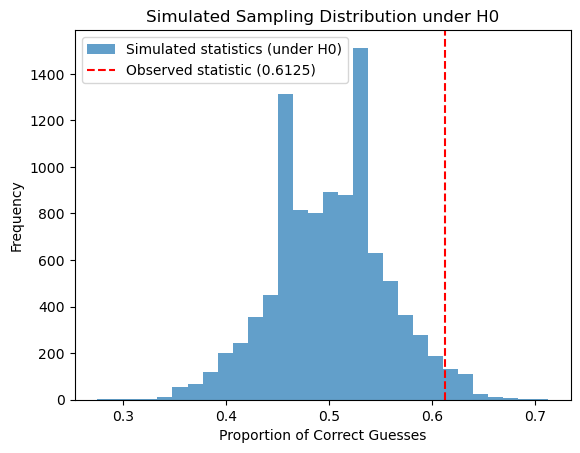

Observed statistic: 0.6125
One-tailed p-value: 0.0294


In [5]:
#Q8 continued
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Observed values
n_students = 80
n_correct = 49
observed_statistic = n_correct / n_students

# Null hypothesis parameter (p = 0.5 for random guessing)
population_parameter_value_under_H0 = 0.5

# Simulate 10,000 samples under the null hypothesis
n_simulations = 10000
simulated_statistics = np.random.binomial(n=n_students, p=population_parameter_value_under_H0, size=n_simulations) / n_students

# Compute the one-tailed p-value (proportion of simulated statistics >= observed statistic)
p_value_one_tailed = np.mean(simulated_statistics >= observed_statistic)

# Plotting the sampling distribution and marking the observed statistic
plt.hist(simulated_statistics, bins=30, alpha=0.7, label='Simulated statistics (under H0)')
plt.axvline(observed_statistic, color='red', linestyle='--', label=f'Observed statistic ({observed_statistic:.4f})')
plt.title('Simulated Sampling Distribution under H0')
plt.xlabel('Proportion of Correct Guesses')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display results
print(f"Observed statistic: {observed_statistic:.4f}")
print(f"One-tailed p-value: {p_value_one_tailed:.4f}")

Findings and Discussion:

Observed Statistic: The observed proportion of correct guesses was 0.6125
The p-value is calculated to be 0.0294.

Since this p-value is less than the common threshold of 0.05 (consistent with the 95% confidence interval), we reject the null hypothesis and conclude that there is evidence that STA130 students have some ability to identify whether milk or tea was poured first, beyond random guessing

A notable point of discussion here is that this analysis mirrors Fisher's original tea experiment but with a larger, more generalized population. Unlike the original case with Dr. Bristol, the students may not have had any extensive experience with tea pouring or tea tasting, making the assumption of random guessing more plausible. This is a recreation of a research experiment and a form of peer review. 

Q9: I used ChatGPT and read the textbook. I find the textbook useful. It is relatively coherent and clear as well as addresses the main points sufficiently.

ChatGPT Summary #1
In our exchanges, we discussed several statistical concepts related to hypothesis testing. We started by clarifying the distinction between testable ideas and non-testable ones, explaining that testable ideas are measurable using observable data. We also defined the key criteria for a good null hypothesis, emphasizing that it should be clear, specific, and falsifiable. Additionally, we differentiated between the null hypothesis, which assumes no effect or difference, and the alternative hypothesis, which suggests the presence of an effect or difference.

Next, we explained the importance of outcomes referring to population parameters rather than sample statistics. Using technical terms like xi, x̄ (sample mean), μ (population mean), and μ₀ (null hypothesis mean), we clarified that hypothesis tests aim to infer information about the entire population from sample data. We also discussed why, in calculating a p-value, we imagine a world where the null hypothesis is true. This assumption helps us determine how likely it is to observe our data if the null hypothesis were correct.

We further elaborated on why a smaller p-value makes the null hypothesis look more unlikely or "ridiculous," explaining that a small p-value indicates that the observed data is highly unlikely under the null hypothesis. Finally, we addressed the fact that a small p-value cannot definitively prove that the null hypothesis is false; it only suggests that the null hypothesis is unlikely based on the data.

Throughout the interaction, we simulated p-values for a scenario involving couples tilting their heads while kissing, using a 50/50 coin-flipping model under the null hypothesis. The results showed very small p-values, reinforcing the idea that the null hypothesis of no head tilt preference is unlikely, but not definitively disproven.

https://chatgpt.com/share/670b47ee-3ec0-800d-b3c5-38ccf6514504

ChatGPT Summary #2
In our conversation, you first provided a dataset with patient health scores and asked for help in modifying the data. You calculated the change in health scores between the initial and final values, and I explained why the subtraction order matters (final - initial) to show improvement. You later introduced a process of adding randomness to the signs of these changes and explored how the output would vary based on the random flipping of positive and negative values.

Next, you moved on to a statistical question about computing p-values. I helped you modify code for a one-tailed hypothesis test by adjusting your two-tailed approach. I explained how the focus shifts from testing deviations in both directions (greater or smaller than the null) to only testing whether the observed value is greater than the expected value, making the p-value potentially smaller.

We then tackled the Fisher Tea Experiment assignment, where 49 out of 80 STA130 students correctly identified whether tea or milk was poured first. You asked for guidance on structuring the analysis with hypotheses and simulations. We developed a one-tailed hypothesis test using a binomial model to simulate the null hypothesis (p = 0.5 for random guessing) and computed the p-value based on how many simulations exceeded the observed proportion of correct guesses (0.6125). I explained how, with a p-value lower than 0.05, you would reject the null hypothesis and conclude that students might have some real ability to identify the tea-pouring order.

Lastly, I summarized the approach and explained how this modern experiment differs from the original Fisher experiment in terms of population and hypothesis testing context.

https://chatgpt.com/share/670b4870-94e4-800d-9323-784a1f2328aa